In [2]:

%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks


In [10]:
from utils import *

In [4]:
#Load the dataset where features have null values
ge_state_n = pd.read_csv("datasets/ge_state_outcome_tamoxifen_v4.csv",
            index_col="patient_ID")
ge_df = pd.read_csv("datasets/merged-combat15.csv", index_col="patient_ID")

In [55]:
ge_state_n

,ER,HER2,PR,node,posOutcome,tumor,series_id_0,series_id_1,series_id_2,series_id_3,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
22449,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.560791,7.325761,7.712692,7.505766,3.928333,4.595116,5.512795,7.291262,6.626688,8.059083
22450,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.008537,7.175220,6.823591,11.356938,3.950556,2.851631,4.666013,5.994875,5.619837,7.265902
22451,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.548279,6.017597,6.386842,8.191975,3.754025,3.212675,5.312667,6.974660,4.953440,5.237441
22452,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.037482,7.497329,6.848631,11.334273,3.573169,2.772652,5.661542,6.188046,6.635075,6.261023
22453,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.814779,7.470131,7.739834,7.775924,3.758116,2.837425,5.918060,6.168264,5.724966,7.322795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441917,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,3.500689,7.208498,6.803962,7.131431,3.569871,3.626728,6.121147,6.403925,5.895984,6.760917
441918,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,3.500689,8.069725,7.600192,8.075222,3.569871,3.626728,5.506148,6.462088,5.763423,7.151660
441919,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,3.500689,7.332330,7.810383,8.636448,3.569871,3.626728,5.731390,7.149135,5.763423,5.783338


In [8]:
state_cols_1 = ['ER', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'pam_coincide_0', 'pam_coincide_1', 'pam_coincide_2', 'pam_coincide_3', 'pam_coincide_4', 'radiotherapyClass_0', 'radiotherapyClass_1', 'p5_0', 'p5_1', 'p5_2', 'p5_3', 'p5_4',
      "HER2", "PR", "node", "tumor"]
ge_df_outcome = pd.merge(ge_df, ge_state_n["posOutcome"], left_index=True, right_index=True)
X_ge, y_ge = ge_df_outcome.drop(["posOutcome"], axis=1), ge_df_outcome["posOutcome"]
X_ge_train, X_ge_test, y_ge_train, y_ge_test = get_train_test_set(ge_df_outcome, "/var/www/datasets/tamox_train_set.txt", "/var/www/datasets/tamox_test_set.txt")
X_ge_st_train, X_ge_st_test, y_ge_st_train, y_ge_st_test = get_train_test_set(ge_state_n, "/var/www/datasets/tamox_train_set.txt", "/var/www/datasets/tamox_test_set.txt")
X_ge_train

,MAGEA12,MAGEA11,KLF1,ADH7,MSH4,BIRC3,AKR1C4,GBX2,GCGR,SIGLEC9,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
22473,3.402084,3.494320,4.023385,3.541183,3.832442,6.952044,3.855832,4.082446,3.627827,4.335390,...,3.974718,5.558950,5.514646,6.841577,3.183982,4.412229,6.200891,6.647563,6.251839,5.097675
249608,4.187661,3.866810,4.085393,3.139782,4.328903,5.025544,3.661857,4.191745,3.685930,4.569808,...,3.842874,6.804398,7.363036,8.035668,4.077028,3.948575,6.492446,5.693120,6.294657,5.586593
249599,4.837456,4.006630,3.761547,3.688134,4.285157,6.048967,3.363964,3.470209,3.483006,4.521905,...,3.334548,7.619913,7.060920,8.144723,3.051310,3.543237,5.964417,6.366522,6.379608,6.199579
441791,3.187184,3.628224,3.539075,3.587210,3.619540,5.592908,3.491800,3.593392,3.615120,4.072719,...,3.500689,7.447879,5.975008,8.160910,3.569871,3.626728,6.146075,6.470966,5.285979,6.637736
249560,3.374551,3.497133,3.661740,3.460654,3.436120,5.450084,3.396684,3.840728,3.782517,4.735773,...,3.867339,5.562545,6.554106,7.087424,3.667209,3.522804,7.350276,6.389579,6.662883,4.938632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,3.791553,3.662776,4.079825,3.758397,3.395359,5.764780,3.540518,3.281390,3.479762,4.149927,...,3.464084,6.851393,6.865060,9.865863,3.543129,3.991906,6.949398,7.204528,5.047344,6.525453
441685,3.085443,3.653459,4.123113,3.680947,3.647998,5.939426,3.512556,3.546215,3.612820,4.027431,...,3.549222,5.925519,5.060669,6.356471,3.653427,3.766725,6.038282,5.789259,7.032159,6.530652
441899,3.187184,3.628224,3.539075,4.944182,3.619540,5.592908,3.491800,3.593392,3.615120,4.072719,...,3.500689,7.269916,7.222344,10.263361,3.569871,3.626728,6.107571,7.614689,6.006757,5.465672
305219,3.152498,3.654102,3.478021,3.613843,3.624577,7.054350,3.489415,3.558475,3.608941,4.076373,...,3.466420,6.817555,6.496405,9.184417,3.420080,3.521218,5.430783,7.427696,5.050724,6.400798


In [5]:
from pymrmre import mrmr

# solutions = mrmr.mrmr_ensemble(features=X_ge_train, targets=y_ge_train.to_frame(), solution_length=100, solution_count=1)

In [6]:
# feats_100 = solutions[0][0]

feats_100 = load_features("/var/www/datasets/feats_100_raw_nn.txt")

In [131]:
with open("/var/www/datasets/feats_100_raw_nn.txt", "w") as fp:
    for ft in feats_100:
        fp.write("{0}\n".format(ft))

In [56]:
params_ge_auc, clf_ge_auc, cv_scores_ge_auc, test_scores_ge_auc = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test), feats=feats_100, split=False)
print(params_ge_auc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:03:09] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 3.87 seconds.
Best Score: 85.065%
{'subsample': 0.6, 'scale_pos_weight': 0.5, 'n_estimators': 120, 'min_child_weight': 1, 'max_depth': 6, 'max_delta_step': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
[13:03:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.5s finished


In [57]:
params_ge_ap, clf_ge_ap, cv_scores_ge_ap, test_scores_ge_ap = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test), feats=feats_100, split=False, rand_scoring=average_precision_0)
print(params_ge_ap)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:03:31] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 3.21 seconds.
Best Score: 25.211%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:03:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.1s finished


In [58]:
params_ge_acc, clf_ge_acc, cv_scores_ge_acc, test_scores_ge_acc = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test), feats=feats_100, rand_scoring="balanced_accuracy", split=False)
print(params_ge_acc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:03:39] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.58 seconds.
Best Score: 74.529%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:03:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.4s finished


In [76]:
params_ge_st_ap, clf_ge_st_ap, cv_scores_ge_st_ap, test_scores_ge_st_ap = evaluate_ge((X_ge_st_train, X_ge_st_test, y_ge_train, y_ge_test), feats=feats_100, outcome_cols=state_cols_1, rand_scoring=average_precision_0, split=False)
print(params_ge_st_ap)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:45:37] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:45:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.89 seconds.
Best Score: 25.111%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:45:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.7s finished


In [77]:
params_ge_st_acc, clf_ge_st_acc, cv_scores_ge_st_acc, test_scores_ge_st_acc = evaluate_ge((X_ge_st_train, X_ge_st_test, y_ge_train, y_ge_test), feats=feats_100, rand_scoring="balanced_accuracy", split=False)
print(params_ge_st_acc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:46:04] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:46:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.62 seconds.
Best Score: 74.529%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:46:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.5s finished


In [73]:
print_score_comparison_v2(cv_scores_ge_ap, cv_scores_ge_st_ap, test_scores_ge_ap, test_scores_ge_st_ap ,header_1="MRMR 100", header_2="MRMR 100 + State", opt="AP_0")

	Validation set - AP_0

			MRMR 100				MRMR 100 + State
		-------------------------------------------------------
balanced_accuracy:	62.71%				62.75%

recall_0:		91.67%				90.83%

precision_0:		33.66%				33.80%

recall_1:		33.75%				34.66%

precision_1:		91.87%				91.39%

auc:			78.60%				78.35%



	Test set - AP_0

			MRMR 100				MRMR 100 + State
		-------------------------------------------------------
balanced_accuracy:	60.39%				62.43%

recall_0:		86.27%				88.24%

precision_0:		32.12%				33.33%

recall_1:		34.51%				36.62%

precision_1:		87.50%				89.66%

auc:			72.27%				72.92%



In [78]:
print_score_comparison_v2(cv_scores_ge_ap, cv_scores_ge_st_acc, test_scores_ge_acc, test_scores_ge_st_acc, header_1="MRMR 100", header_2="MRMR 100 + State", opt="Acc Opt")

	Validation set - Acc Opt

			MRMR 100				MRMR 100 + State
		-------------------------------------------------------
balanced_accuracy:	62.71%				74.53%

recall_0:		91.67%				63.33%

precision_0:		33.66%				62.14%

recall_1:		33.75%				85.72%

precision_1:		91.87%				86.62%

auc:			78.60%				84.56%



	Test set - Acc Opt

			MRMR 100				MRMR 100 + State
		-------------------------------------------------------
balanced_accuracy:	64.37%				64.37%

recall_0:		47.06%				47.06%

precision_0:		48.00%				48.00%

recall_1:		81.69%				81.69%

precision_1:		81.12%				81.12%

auc:			72.73%				72.73%



In [34]:

alt_cv_scores, alt_test_scores = alt_train_test(ge_df_outcome, feats_100)

Using seed: 81
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[11:37:46] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:37:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.67 seconds.
Best Score: 25.826%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[11:37:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluati

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.5s finished


In [35]:
print_score_comparison(cv_scores_ge_ap, alt_cv_scores, header_1="Seed 42", header_2="Other seeds")

	Validation set	posOutcome
			Seed 42		Other seeds
		-------------------------------------------------------
balanced_accuracy:	62.71%				60.61%

recall_0:		91.67%				93.06%

precision_0:		33.66%				32.18%

recall_1:		33.75%				28.17%

precision_1:		91.87%				91.30%

auc:			78.60%				75.90%



In [36]:
print_score_comparison(test_scores_ge_ap, alt_test_scores, header_1="Seed 42", header_2="Other seeds", title="Test set")

	Test set	posOutcome
			Seed 42		Other seeds
		-------------------------------------------------------
balanced_accuracy:	60.39%				62.39%

recall_0:		86.27%				92.16%

precision_0:		32.12%				32.96%

recall_1:		34.51%				32.63%

precision_1:		87.50%				92.05%

auc:			72.27%				76.93%



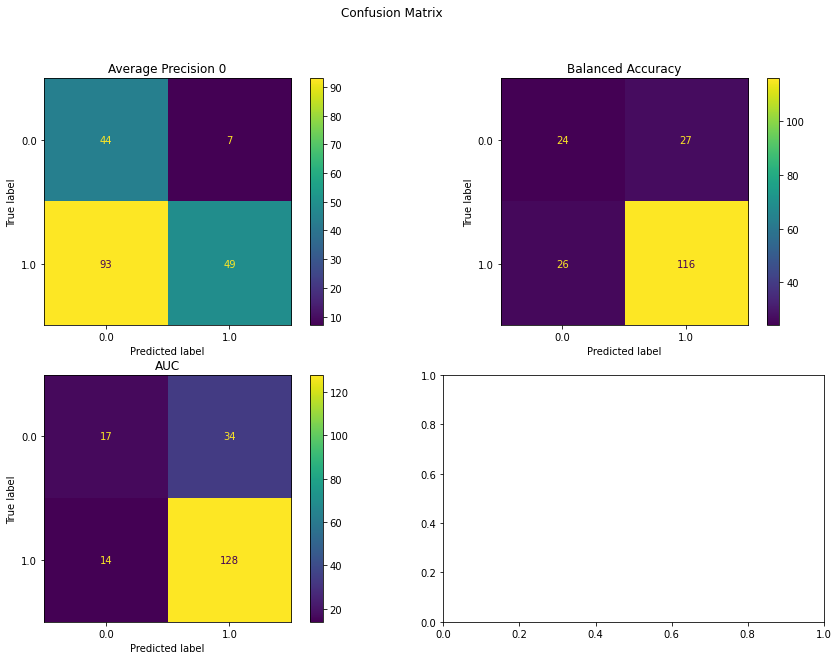

In [37]:
figs_1, axs_1 = plt.subplots(2, 2, figsize=(15, 10))
figs_1.suptitle("Confusion Matrix")
axs_1[0, 0].set_title("Average Precision 0")
axs_1[0, 1].set_title("Balanced Accuracy")
axs_1[1, 0].set_title("AUC")
plot_confusion_matrix(clf_ge_ap, X_ge_test[feats_100], y_ge_test, ax=axs_1[0, 0])
plot_confusion_matrix(clf_ge_acc, X_ge_test[feats_100], y_ge_test, ax=axs_1[0, 1])
plot_confusion_matrix(clf_ge_auc, X_ge_test[feats_100], y_ge_test, ax=axs_1[1, 0])

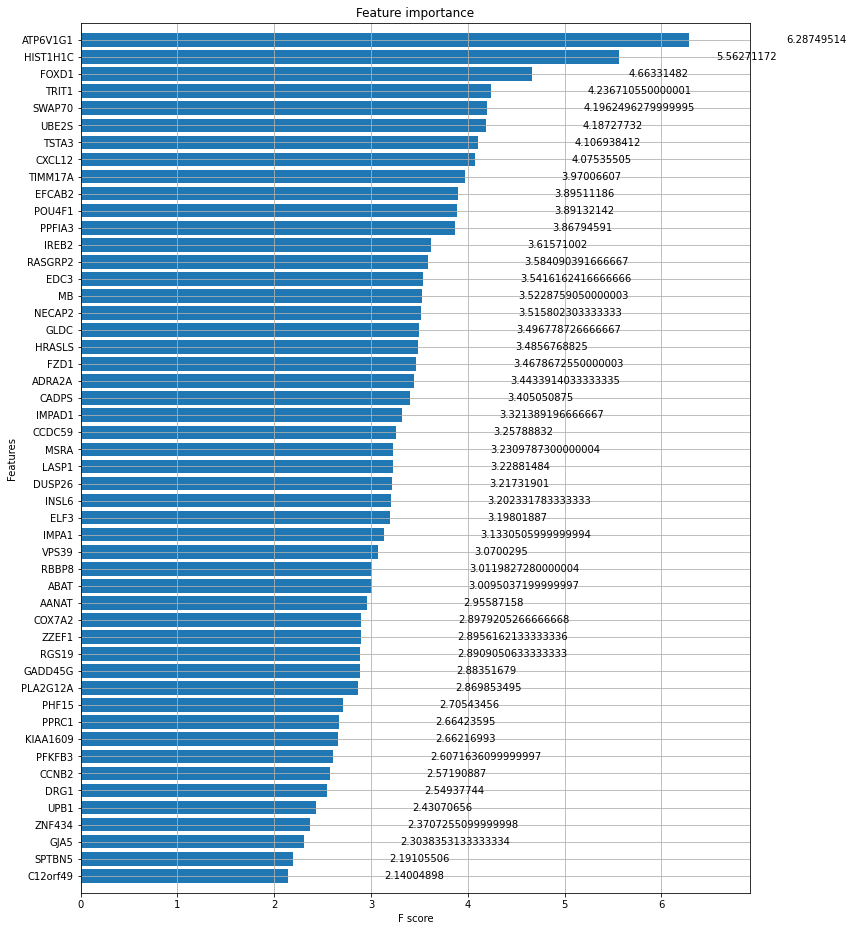

In [38]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12, 16))
plot_importance(clf_ge_ap, max_num_features=50, height=0.8, ax=ax, importance_type='gain')
plt.show()

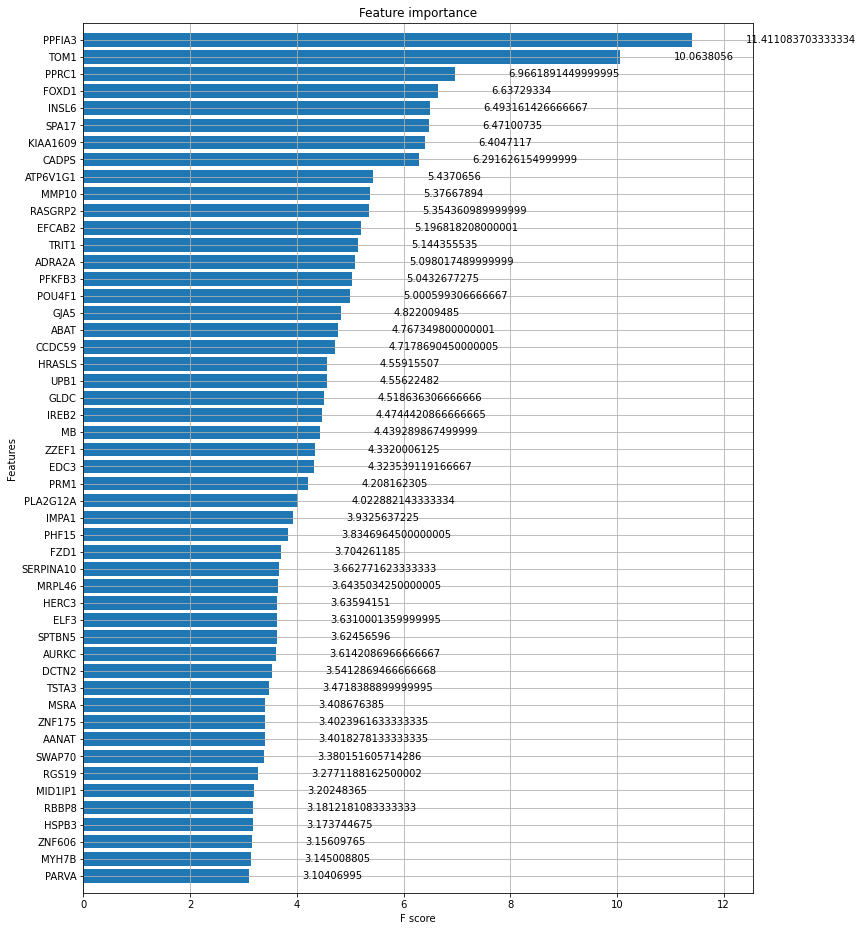

In [79]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12, 16))
plot_importance(clf_ge_acc, max_num_features=50, height=0.8, ax=ax, importance_type='gain')
plt.show()

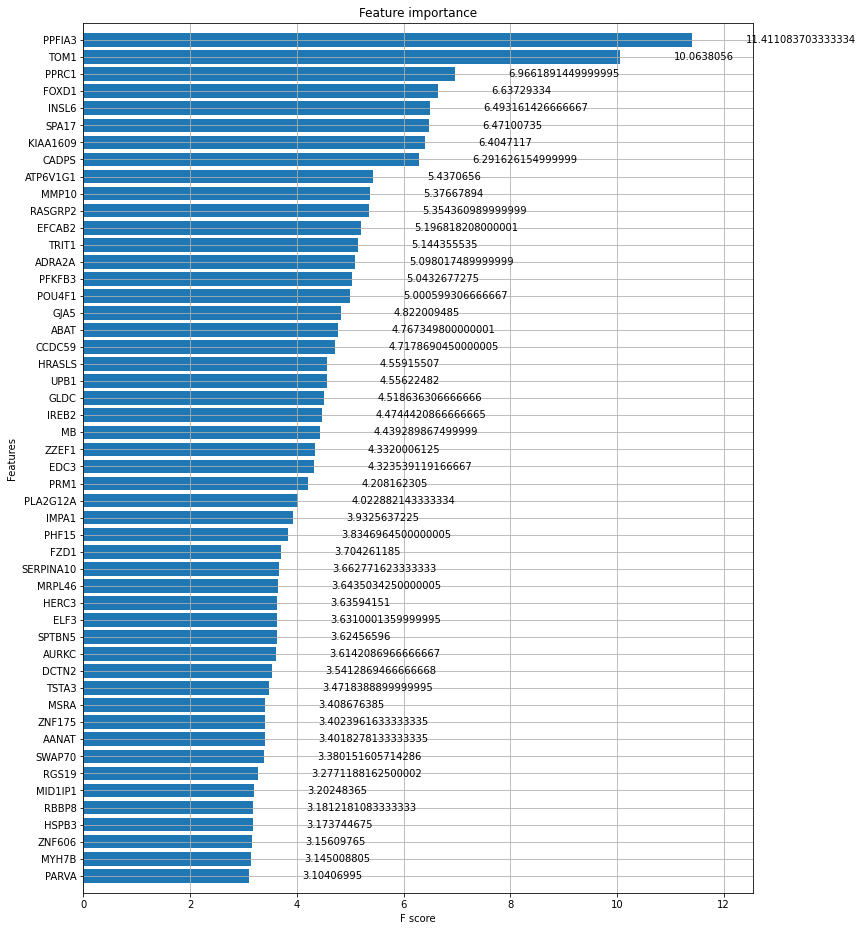

In [80]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12, 16))
plot_importance(clf_ge_st_acc, max_num_features=50, height=0.8, ax=ax, importance_type='gain')
plt.show()

In [83]:
##Oversampling of class 0 patients
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
X_train_ge_smote, y_train_ge_smote = SMOTE().fit_resample(X_ge_train, y_ge_train)
print(sorted(Counter(y_train_ge_smote).items()))
solutions_smote = mrmr.mrmr_ensemble(features=X_train_ge_smote, targets=y_train_ge_smote.to_frame(), solution_length=100, solution_count=1)
feats_100_smote = solutions_smote[0][0]

[(0.0, 329), (1.0, 329)]


In [87]:
params_ge_smote_auc, clf_ge_smote_auc, cv_scores_ge_smote_auc, test_scores_ge_smote_auc = evaluate_ge((X_train_ge_smote, X_ge_test, y_train_ge_smote, y_ge_test),  split=False, scale_weight=False, feats=feats_100_smote)
print(params_ge_smote_auc)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:49:20] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:49:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 5.58 seconds.
Best Score: 94.498%
{'subsample': 0.6, 'n_estimators': 120, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.8}
[16:49:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    5.1s finished


In [ ]:
params_ge_smote_ap, clf_ge_smote_ap, cv_scores_ge_smote_ap, test_scores_ge_smote_ap = evaluate_ge((X_train_ge_smote, X_ge_test, y_train_ge_smote, y_ge_test),  split=False, scale_weight=False, feats=feats_100_smote, rand_scoring=average_precision_0)
print(params_ge_smote_ap)


In [82]:
params_ge_smote_acc, clf_ge_smote_acc, cv_scores_ge_smote_acc, test_scores_ge_smote_acc = evaluate_ge((X_train_ge_smote, X_ge_test, y_train_ge_smote, y_ge_test),  split=False, scale_weight=False, feats=feats_100_smote, rand_scoring="balanced_accuracy")
print(params_ge_smote_acc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:27:44] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:27:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 4.85 seconds.
Best Score: 89.070%
{'subsample': 1.0, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.02, 'gamma': 2, 'colsample_bytree': 0.6}
[16:28:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chan

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.2s finished


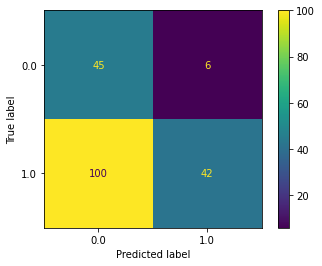

In [45]:

plot_confusion_matrix(clf_ge_smote_ap,X_ge_test[feats_100], y_ge_test)

In [84]:
X_train_ge_adasyn, y_train_ge_adasyn = ADASYN().fit_resample(X_ge_train, y_ge_train)

print(sorted(Counter(y_train_ge_adasyn).items()))
solutions_adasyn = mrmr.mrmr_ensemble(features=X_train_ge_adasyn, targets=y_train_ge_adasyn.to_frame(), solution_length=100, solution_count=1)
feats_100_adasyn = solutions_adasyn[0][0]

[(0.0, 309), (1.0, 329)]


In [88]:
params_ge_adasyn_auc, clf_ge_adasyn_auc, cv_scores_ge_adasyn_auc, test_scores_ge_adasyn_auc = evaluate_ge((X_train_ge_adasyn, X_ge_test, y_train_ge_adasyn, y_ge_test), scale_weight=False, feats=feats_100_adasyn, split=False)
print(params_ge_adasyn_auc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:50:17] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:50:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 4.3 seconds.
Best Score: 95.532%
{'subsample': 0.6, 'n_estimators': 120, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.8}
[16:50:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.8s finished


In [85]:
params_ge_adasyn_ap, clf_ge_adasyn_ap, cv_scores_ge_adasyn_ap, test_scores_ge_adasyn_ap = evaluate_ge((X_train_ge_adasyn, X_ge_test, y_train_ge_adasyn, y_ge_test), scale_weight=False, feats=feats_100_adasyn, split=False, rand_scoring=average_precision_0)
print(params_ge_adasyn_ap)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:30:24] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:30:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 4.38 seconds.
Best Score: 44.372%
{'subsample': 0.6, 'n_estimators': 120, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.8}
[16:30:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.9s finished


In [86]:
params_ge_adasyn_acc, clf_ge_adasyn_acc, cv_scores_ge_adasyn_acc, test_scores_ge_adasyn_acc = evaluate_ge((X_train_ge_adasyn, X_ge_test, y_train_ge_adasyn, y_ge_test), scale_weight=False, feats=feats_100_adasyn, split=False, rand_scoring="balanced_accuracy")
print(params_ge_adasyn_acc)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:31:12] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:31:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 4.38 seconds.
Best Score: 88.883%
{'subsample': 0.6, 'n_estimators': 120, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.8}
[16:31:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.9s finished


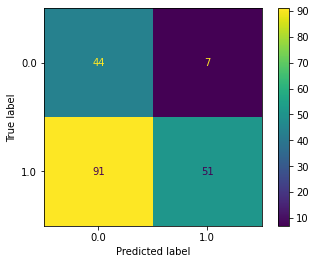

In [46]:
plot_confusion_matrix(clf_ge_adasyn_ap ,X_ge_test[feats_100], y_ge_test)

In [47]:
print_score_comparison(cv_scores_ge_ap, cv_scores_ge_smote_ap, header_1 = "No Sampling", header_2="SMOTE Oversampling")

	Validation set	posOutcome
			No Sampling		SMOTE Oversampling
		-------------------------------------------------------
balanced_accuracy:	62.71%				58.66%

recall_0:		91.67%				99.39%

precision_0:		33.66%				54.78%

recall_1:		33.75%				17.93%

precision_1:		91.87%				96.64%

auc:			78.60%				92.05%



In [48]:
print_score_comparison(test_scores_ge_ap, test_scores_ge_smote_ap, header_1 = "No Sampling", header_2="SMOTE Oversampling", title="Test set")

	Test set	posOutcome
			No Sampling		SMOTE Oversampling
		-------------------------------------------------------
balanced_accuracy:	60.39%				58.91%

recall_0:		86.27%				88.24%

precision_0:		32.12%				31.03%

recall_1:		34.51%				29.58%

precision_1:		87.50%				87.50%

auc:			72.27%				72.04%



In [49]:
print_score_comparison(cv_scores_ge_ap, cv_scores_ge_adasyn_ap, header_1 = "No Sampling", header_2="ADASYN Oversampling")

	Validation set	posOutcome
			No Sampling		ADASYN Oversampling
		-------------------------------------------------------
balanced_accuracy:	62.71%				65.49%

recall_0:		91.67%				99.68%

precision_0:		33.66%				57.70%

recall_1:		33.75%				31.30%

precision_1:		91.87%				99.00%

auc:			78.60%				92.99%



In [50]:
print_score_comparison(test_scores_ge_ap, test_scores_ge_adasyn_ap, header_1 = "No Sampling", header_2="ADASYN Oversampling", title="Test set")


	Test set	posOutcome
			No Sampling		ADASYN Oversampling
		-------------------------------------------------------
balanced_accuracy:	60.39%				61.10%

recall_0:		86.27%				86.27%

precision_0:		32.12%				32.59%

recall_1:		34.51%				35.92%

precision_1:		87.50%				87.93%

auc:			72.27%				70.51%



In [11]:
# trying various feature numbers
feats_score = {}
for i in range(50, 550, 50):
    slns = mrmr.mrmr_ensemble(features=X_ge_train, targets=y_ge_train.to_frame(), solution_length=i, solution_count=1)
    fts = slns[0][0]
    _, _, cv_scores_fts, test_scores_fts = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test), split=False, rand_scoring="balanced_accuracy",
                feats=fts)
    feats_score[i] = []
    feats_score[i].append(cv_scores_fts.mean().to_dict())
    feats_score[i].append(test_scores_fts.mean().to_dict())
acc_scores_train = []
specificity_scores_train = []
auc_scores_train = []
recall_1_scores_train = []
for k in feats_score:
    acc_scores_train.append(feats_score[k][0]["balanced_accuracy"])
    specificity_scores_train.append(feats_score[k][0]["specificity"])
    auc_scores_train.append(feats_score[k][0]["auc"])
    recall_1_scores_train.append(feats_score[k][0]["recall_1"])

acc_scores_test = []
specificity_scores_test = []
auc_scores_test = []
recall_1_scores_test = []
for k in feats_score:
    acc_scores_test.append(feats_score[k][1]["balanced_accuracy"])
    specificity_scores_test.append(feats_score[k][1]["specificity"])
    auc_scores_test.append(feats_score[k][1]["auc"])
    recall_1_scores_test.append(feats_score[k][1]["recall_1"])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[11:12:26] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 1.65 seconds.
Best Score: 76.033%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 6, 'max_delta_step': 4, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.8}
[11:12:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

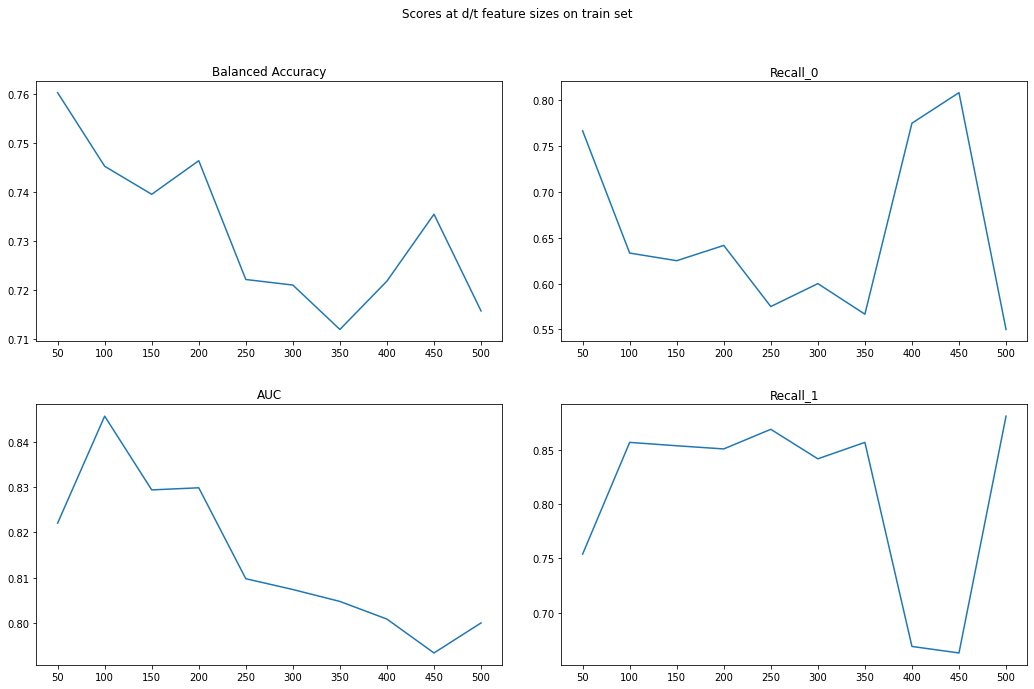

In [45]:
from matplotlib.ticker import MaxNLocator
counts = [x for x in range(50, 550, 50)]
fig_train, axs_train = plt.subplots(2, 2, figsize=(15, 10))
fig_train.suptitle("Scores at d/t feature sizes on train set")
axs_train[0, 0].plot(counts, acc_scores_train)
axs_train[0, 0].set_title("Balanced Accuracy")
axs_train[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_train[0, 1].plot(counts, specificity_scores_train)
axs_train[0, 1].set_title("Recall_0")
axs_train[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_train[1, 0].plot(counts, auc_scores_train)
axs_train[1, 0].set_title("AUC")
axs_train[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_train[1, 1].plot(counts, recall_1_scores_train)
axs_train[1, 1].set_title("Recall_1")
axs_train[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
fig_train.tight_layout(pad=3.0)

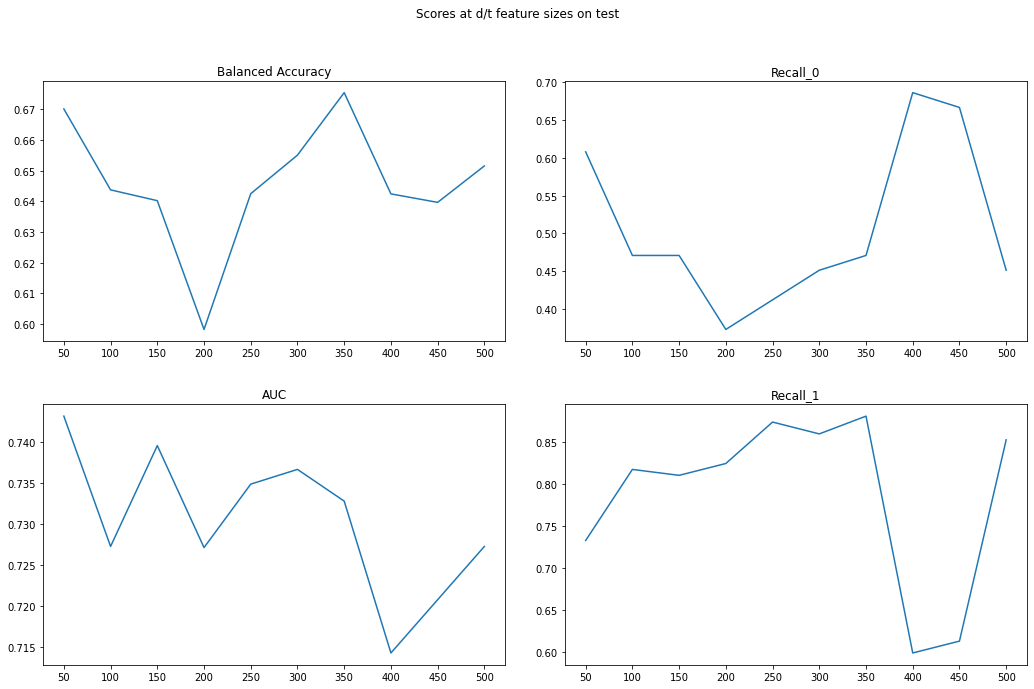

In [46]:
counts = [x for x in range(50, 550, 50)]
fig_test, axs_test = plt.subplots(2, 2, figsize=(15, 10))
fig_test.suptitle("Scores at d/t feature sizes on test")
axs_test[0, 0].plot(counts, acc_scores_test)
axs_test[0, 0].set_title("Balanced Accuracy")
axs_test[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_test[0, 1].plot(counts, specificity_scores_test)
axs_test[0, 1].set_title("Recall_0")
axs_test[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_test[1, 0].plot(counts, auc_scores_test)
axs_test[1, 0].set_title("AUC")
axs_test[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_test[1, 1].plot(counts, recall_1_scores_test)
axs_test[1, 1].set_title("Recall_1")
axs_test[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
fig_test.tight_layout(pad=3.0)

In [52]:
sorted_idx_train = np.argsort(acc_scores_train)
sorted_idx_test = np.argsort(acc_scores_test)
print("Highest accuracy on train: {0:.2%} at {1} features".format(acc_scores_train[sorted_idx_train[-1]], (sorted_idx_train[-1] + 1)*50))
print("Highest accuracy on test: {0:.2%} at {1} features".format(acc_scores_test[sorted_idx_test[-1]], (sorted_idx_test[-1] + 1)*50))

Highest accuracy on train: 76.03% at 50 features
Highest accuracy on test: 67.54% at 350 features


In [51]:
acc_scores_train[0]

0.7603263403263403

In [46]:
solutions_2 = mrmr.mrmr_ensemble(features=X_ge_train, targets=y_ge_train.to_frame(), solution_length=300, solution_count=1)
feats_300 = solutions_2[0][0]

In [47]:
params_ft_300, clf_ft_300, cv_scores_ft_300, test_scores_ft_300 = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test),  split=False, feats=feats_300, rand_scoring=average_precision_0)
print(params_ft_300)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:41:36] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:41:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 31.93 seconds.
Best Score: 24.451%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:42:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   29.9s finished


In [48]:
params_ft_300_v2, clf_ft_300_v2, cv_scores_ft_300_v2, test_scores_ft_300_v2 = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test),  split=False, feats=feats_300, rand_scoring=average_precision_1)
print(params_ft_300_v2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:42:54] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:42:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 30.24 seconds.
Best Score: 85.725%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 600, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:43:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric u

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   27.6s finished


In [49]:
print_score_comparison(cv_scores_ge_ap, cv_scores_ft_300, header_1="100 feats", header_2="300 feats", title="Validation set - AP opt\n")

	Validation set - AP opt
	posOutcome
			100 feats		300 feats
		-------------------------------------------------------
balanced_accuracy:	64.72%				68.86%

recall_0:		84.17%				86.67%

precision_0:		35.98%				39.25%

recall_1:		45.27%				51.06%

precision_1:		88.87%				91.37%

auc:			76.52%				79.14%



In [50]:
print_score_comparison(test_scores_ge_ap, test_scores_ft_300, header_1="100 feats", header_2="300 feats", title="Test set")

	Test set	posOutcome
			100 feats		300 feats
		-------------------------------------------------------
balanced_accuracy:	71.78%				60.14%

recall_0:		92.16%				74.51%

precision_0:		40.52%				33.04%

recall_1:		51.41%				45.77%

precision_1:		94.81%				83.33%

auc:			82.45%				71.07%



In [143]:
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
pipe_1 = make_pipeline(ColumnSelector(cols=feats_100), clf_ge_ap)
pipe_2 = make_pipeline(ColumnSelector(cols=feats_100), clf_n_v5)
sclf_1 = StackingCVClassifier(classifiers=[pipe_1, pipe_2], meta_classifier=LogisticRegression(),
                              cv=st_cv, verbose=True, use_probas=False,
                              random_state=seed)

cv_results_sclf_1 = cross_validate(sclf_1, X_ge_train, y_ge_train,
                                   n_jobs=10, scoring=scoring, cv=st_cv)

cv_results_sclf_1_df = get_scores(cv_results_sclf_1)
cv_results_sclf_1_df.mean()

balanced_accuracy      0.764586
recall_0               0.675000
precision_0            0.629932
recall_1               0.854172
precision_1            0.878812
auc                    0.784614
specificity            0.675000
average_precision_0    0.221285
dtype: float64

In [144]:
sclf_1.fit(X_ge_train, y_ge_train)
test_scores_sclf_1_df = calc_scores(sclf_1, X_ge_test, y_ge_test)
test_scores_sclf_1_df.mean()

Fitting 2 classifiers...
Fitting classifier1: pipeline (1/2)
[18:29:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


balanced_accuracy      0.621375
recall_0               0.411765
precision_0            0.466667
recall_1               0.830986
precision_1            0.797297
auc                    0.674537
specificity            0.411765
average_precision_0    0.228045
dtype: float64

In [147]:
print_score_comparison(test_scores_ge_ap, test_scores_sclf_1_df, header_1="AP_0 Model", header_2="Ensemble Model", title="Test set")

	Test set	posOutcome
			AP_0 Model		Ensemble Model
		-------------------------------------------------------
balanced_accuracy:	63.08%				62.14%

recall_0:		80.39%				41.18%

precision_0:		34.75%				46.67%

recall_1:		45.77%				83.10%

precision_1:		86.67%				79.73%

auc:			71.62%				67.45%



In [82]:
clf_ge_ap.save_model("datasets/models/clf_ge_ap_ft100.json")
clf_ge_acc.save_model("datasets/models/clf_ge_acc_ft100.json")

In [51]:
from sklearn.feature_selection import RFECV
X_feats_100 = X_ge_train[feats_100]
est = XGBClassifier(**params_ge_acc)
rfe = RFECV(est, cv=st_cv, step=5, scoring="balanced_accuracy")
rfe = rfe.fit(X_feats_100, y_ge_train)

[11:53:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [52]:
print("Optimal num of features %d" % rfe.n_features_)

Optimal num of features 95


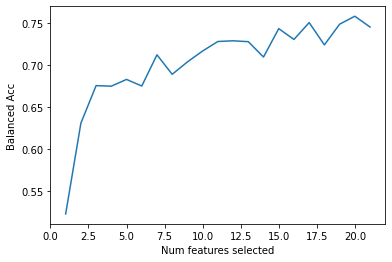

In [53]:
min_num_fts = 1
plt.figure()
plt.xlabel("Num features selected")
plt.ylabel("Balanced Acc")
plt.plot(range(min_num_fts, len(rfe.grid_scores_) + min_num_fts), rfe.grid_scores_)
plt.show()

In [55]:
rfe.grid_scores_

array([0.52314103, 0.6309965 , 0.67564685, 0.67498252, 0.68300699,
       0.67514569, 0.71224359, 0.68909091, 0.70381702, 0.71678904,
       0.72808275, 0.72891026, 0.72786713, 0.70961538, 0.74337413,
       0.73051865, 0.75054779, 0.72405594, 0.74863054, 0.75810023,
       0.74529138])

In [58]:

rk_df = pd.DataFrame({"genes": X_feats_100.columns.to_list(), "rank": rfe.ranking_})
rk_df = rk_df.sort_values(by="rank")
top_95 = rk_df.head(95)["genes"].to_list()

In [60]:
clf_ft_95, cv_scores_ft_95, test_scores_ft_95 = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test),  split=False, feats=top_95, params=params_ge_acc)

[12:08:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV Score: 
balanced_accuracy      0.730828
recall_0               0.616667
precision_0            0.591059
recall_1               0.844988
precision_1            0.858869
auc                    0.821552
specificity            0.616667
average_precision_0    0.220668
dtype: float64

Test Score:
balanced_accuracy      0.657829
recall_0               0.470588
precision_0            0.521739
recall_1               0.845070
precision_1            0.816327
auc                    0.737780
specificity            0.470588
average_precision_0    0.221591
dtype: float64



In [61]:
print_score_comparison(cv_scores_ge_acc, cv_scores_ft_95, header_1="100 feats", header_2="95 feats", title="Validation set\n")

	Validation set
	posOutcome
			100 feats		95 feats
		-------------------------------------------------------
balanced_accuracy:	74.53%				73.08%

recall_0:		63.33%				61.67%

precision_0:		62.14%				59.11%

recall_1:		85.72%				84.50%

precision_1:		86.62%				85.89%

auc:			84.56%				82.16%



In [62]:
print_score_comparison(test_scores_ge_acc, test_scores_ft_95, header_1="100 feats", header_2="95 feats", title="Test set\n")

	Test set
	posOutcome
			100 feats		95 feats
		-------------------------------------------------------
balanced_accuracy:	64.37%				65.78%

recall_0:		47.06%				47.06%

precision_0:		48.00%				52.17%

recall_1:		81.69%				84.51%

precision_1:		81.12%				81.63%

auc:			72.73%				73.78%



In [16]:
# trying various feature numbers
feat_scores_rev = {}
for i in range(5, 100, 5):
    slns = mrmr.mrmr_ensemble(features=X_ge_train, targets=y_ge_train.to_frame(), solution_length=i, solution_count=1)
    fts = slns[0][0]
    _, _, cv_scores_fts, test_scores_fts = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test), split=False, rand_scoring="balanced_accuracy",
                feats=fts)
    feat_scores_rev[i] = []
    feat_scores_rev[i].append(cv_scores_fts.mean().to_dict())
    feat_scores_rev[i].append(test_scores_fts.mean().to_dict())

acc_scores_train_rev = []
specificity_scores_train_rev = []
auc_scores_train_rev = []
recall_1_scores_train_rev = []
for k in feat_scores_rev:
    acc_scores_train_rev.append(feat_scores_rev[k][0]["balanced_accuracy"])
    specificity_scores_train_rev.append(feat_scores_rev[k][0]["specificity"])
    auc_scores_train_rev.append(feat_scores_rev[k][0]["auc"])
    recall_1_scores_train_rev.append(feat_scores_rev[k][0]["recall_1"])

acc_scores_test_rev = []
specificity_scores_test_rev = []
auc_scores_test_rev = []
recall_1_scores_test_rev = []
for k in feat_scores_rev:
    acc_scores_test_rev.append(feat_scores_rev[k][1]["balanced_accuracy"])
    specificity_scores_test_rev.append(feat_scores_rev[k][1]["specificity"])
    auc_scores_test_rev.append(feat_scores_rev[k][1]["auc"])
    recall_1_scores_test_rev.append(feat_scores_rev[k][1]["recall_1"])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[11:58:09] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:58:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 1.63 seconds.
Best Score: 69.487%
{'subsample': 1.0, 'scale_pos_weight': 0.5, 'n_estimators': 20, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 2, 'colsample_bytree': 0.6}
[11:58:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.8s remaining:    0.3s
[Parall

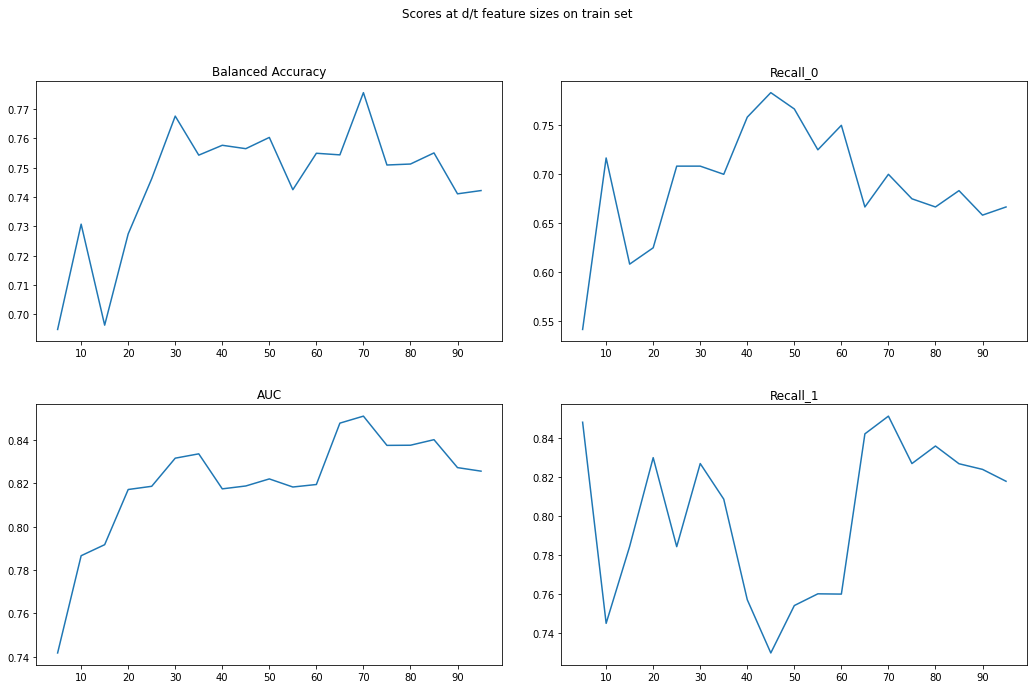

In [42]:

counts = [x for x in range(5, 100, 5)]
fig_train_rev, axs_train_rev = plt.subplots(2, 2, figsize=(15, 10))
fig_train_rev.suptitle("Scores at d/t feature sizes on train set")
axs_train_rev[0, 0].plot(counts, acc_scores_train_rev)
axs_train_rev[0, 0].set_title("Balanced Accuracy")
axs_train_rev[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_train_rev[0, 1].plot(counts, specificity_scores_train_rev)
axs_train_rev[0, 1].set_title("Recall_0")
axs_train_rev[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_train_rev[1, 0].plot(counts, auc_scores_train_rev)
axs_train_rev[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_train_rev[1, 0].set_title("AUC")
axs_train_rev[1, 1].plot(counts, recall_1_scores_train_rev)
axs_train_rev[1, 1].set_title("Recall_1")
axs_train_rev[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
fig_train_rev.tight_layout(pad=3.0)

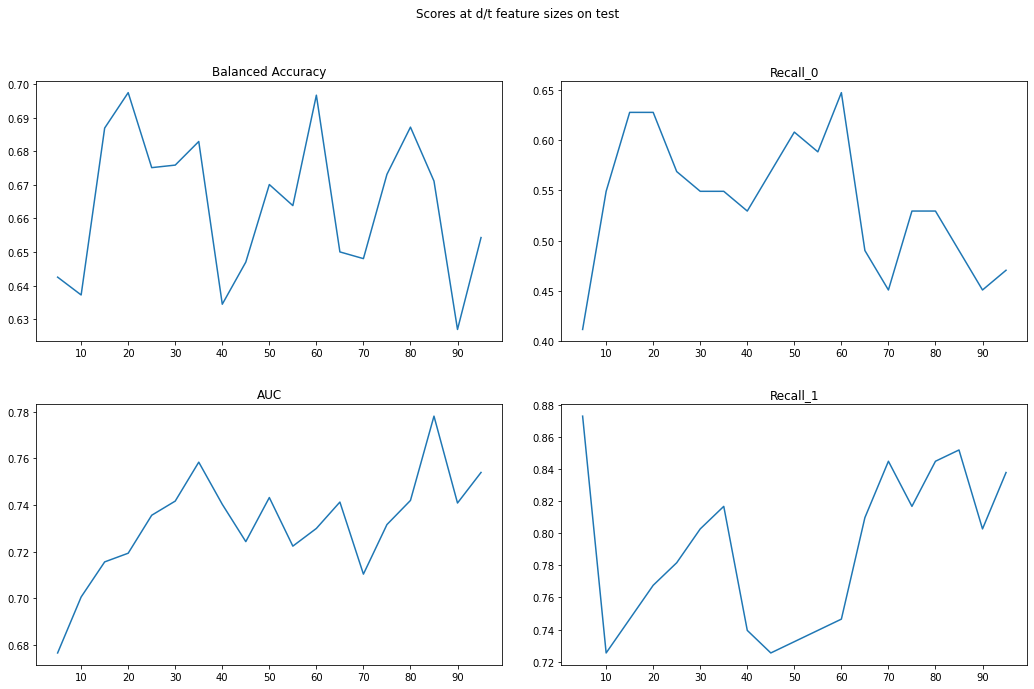

In [41]:
counts = [x for x in range(5, 100, 5)]
fig_test_rev, axs_test_rev = plt.subplots(2, 2, figsize=(15, 10))
fig_test_rev.suptitle("Scores at d/t feature sizes on test")
axs_test_rev[0, 0].plot(counts, acc_scores_test_rev)
axs_test_rev[0, 0].set_title("Balanced Accuracy")
axs_test_rev[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_test_rev[0, 1].plot(counts, specificity_scores_test_rev)
axs_test_rev[0, 1].set_title("Recall_0")
axs_test_rev[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_test_rev[1, 0].plot(counts, auc_scores_test_rev)
axs_test_rev[1, 0].set_title("AUC")
axs_test_rev[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_test_rev[1, 1].plot(counts, recall_1_scores_test_rev)
axs_test_rev[1, 1].set_title("Recall_1")
axs_test_rev[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
fig_test_rev.tight_layout(pad=3.0)

In [53]:
sorted_idx_train_rev = np.argsort(acc_scores_train_rev)
sorted_idx_test_rev = np.argsort(acc_scores_test_rev)
print("Highest accuracy on train: {0:.2%} at {1} features".format(acc_scores_train_rev[sorted_idx_train_rev[-1]], (sorted_idx_train_rev[-1] + 1)*5))
print("Highest accuracy on test: {0:.2%} at {1} features".format(acc_scores_test_rev[sorted_idx_test_rev[-1]], (sorted_idx_test_rev[-1] + 1)*5))

Highest accuracy on train: 77.56% at 70 features
Highest accuracy on test: 69.75% at 20 features


In [36]:
sol_20 = mrmr.mrmr_ensemble(features=X_ge_train, targets=y_ge_train.to_frame(), solution_length=20, solution_count=1)
fts_20 = sol_20[0][0]
params_20, clf_ft_20, cv_scores_ft_20, test_scores_ft_20 = evaluate_ge((X_ge_train, X_ge_test, y_ge_train, y_ge_test),  split=False, feats=fts_20, rand_scoring="balanced_accuracy")
print(params_20)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:21:20] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:21:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 0.88 seconds.
Best Score: 72.744%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.6}
[12:21:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.8s finished


In [39]:
print_score_comparison_v2(cv_scores_ge_acc, cv_scores_ft_20, test_scores_ge_acc ,test_scores_ft_20,header_1="100 feats", header_2="20 feats", opt="Balanced Accuracy")

	Validation set - Balanced Accuracy

			100 feats				20 feats
		-------------------------------------------------------
balanced_accuracy:	74.53%				72.74%

recall_0:		63.33%				62.50%

precision_0:		62.14%				57.51%

recall_1:		85.72%				82.99%

precision_1:		86.62%				85.91%

auc:			84.56%				81.72%



	Test set - Balanced Accuracy

			100 feats				20 feats
		-------------------------------------------------------
balanced_accuracy:	64.37%				69.75%

recall_0:		47.06%				62.75%

precision_0:		48.00%				49.23%

recall_1:		81.69%				76.76%

precision_1:		81.12%				85.16%

auc:			72.73%				71.93%

